# Curvature Filter 

In [14]:
import torch
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.weight = nn.Parameter(torch.ones(1, 1, 3, 3))  # 自定义的权值
        self.bias = nn.Parameter(torch.randn(16))    # 自定义的偏置
  
    def forward(self, x):
        x = x.view(x.size(0), -1)
        out = F.conv2d(x, self.weight, self.bias, stride=1, padding=0)
        return out

def pre_deal(img):
    import torch
    conv = torch.nn.Conv2d(1, 1, 3, stride=1, padding=1)
    img = torch.Tensor(img)
    img = img.reshape(1, 1, img.shape[0], img.shape[1])
    output = conv(img)
    output = output.reshape(output.shape[2], output.shape[3])
    output = output.detach().numpy()

In [40]:
    import torch
    conv = torch.nn.Conv2d(1, 1, 3, stride=1, padding=1)
    print(id(img))
    img2 = torch.Tensor(img)
    img2 = img2.reshape(1, 1, img2.shape[0], img2.shape[1])
    output = conv(img2)
    output = output.reshape(output.shape[2], output.shape[3])
    output = output.detach().numpy()

2402158497008
2402186928440
2402265461528


#### Python implementation of Curvature Filter.

In [43]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.signal

%matplotlib inline

def update_Bern(img, row, col):
    img_ij = img[row:-1:2, col:-1:2]
    img_prev = img[row - 1:-2:2, col:-1:2]; img_next = img[row + 1::2, col:-1:2]
    img_left = img[row:-1:2, col - 1:-2:2]; img_rigt = img[row:-1:2, col + 1::2]

    d1 = (img_prev + img_next)/2.0 - img_ij; d2 = (img_left + img_rigt)/2.0 - img_ij
    d_m = d1 * (np.abs(d1) <= np.abs(d2)) + d2 * (np.abs(d2) < np.abs(d1))
    img_ij[...] += d_m
    
def update_MC(img, row, col):
    img_ij = img[row:-1:2, col:-1:2]; img_ij8 = 8*img_ij
    img_prev = img[row - 1:-2:2, col:-1:2]; img_next = img[row + 1::2, col:-1:2]
    img_left = img[row:-1:2, col - 1:-2:2]; img_rigt = img[row:-1:2, col + 1::2]
    img_leUp = img[row - 1:-2:2, col - 1:-2:2]; img_riUp = img[row - 1:-2:2, col + 1::2];
    img_leDn = img[row + 1::2, col - 1:-2:2]; img_riDn = img[row + 1::2, col + 1::2];

    d1 = 2.5 * (img_prev + img_next) + 5.0 * img_rigt - img_riUp - img_riDn - img_ij8;
    d2 = 2.5 * (img_prev + img_next) + 5.0 * img_left - img_leUp - img_leDn - img_ij8;
    d3 = 2.5 * (img_left + img_rigt) + 5.0 * img_prev - img_leUp - img_riUp - img_ij8;
    d4 = 2.5 * (img_left + img_rigt) + 5.0 * img_next - img_leDn - img_riDn - img_ij8;
    
    d = d1 * (np.abs(d1) >= np.abs(d2)) + d2 * (np.abs(d2) > np.abs(d1))
    d = d * (np.abs(d) >= np.abs(d3)) + d3 * (np.abs(d3) > np.abs(d))
    d = d * (np.abs(d) >= np.abs(d4)) + d4 * (np.abs(d4) > np.abs(d)) 
    d /= 8
    
    img_ij[...] += d

def update_MC2(img, row, col):
    img_ij = img[row:-1:2, col:-1:2]; img_ij8 = 8*img_ij
    img_prev = img[row - 1:-2:2, col:-1:2]; img_next = img[row + 1::2, col:-1:2]
    img_left = img[row:-1:2, col - 1:-2:2]; img_rigt = img[row:-1:2, col + 1::2]
    img_leUp = img[row - 1:-2:2, col - 1:-2:2]; img_riUp = img[row - 1:-2:2, col + 1::2];
    img_leDn = img[row + 1::2, col - 1:-2:2]; img_riDn = img[row + 1::2, col + 1::2];

    d1 = 2.5 * (img_prev + img_next) + 5.0 * img_rigt - img_riUp - img_riDn - img_ij8;
    d2 = 2.5 * (img_prev + img_next) + 5.0 * img_left - img_leUp - img_leDn - img_ij8;
    d3 = 2.5 * (img_left + img_rigt) + 5.0 * img_prev - img_leUp - img_riUp - img_ij8;
    d4 = 2.5 * (img_left + img_rigt) + 5.0 * img_next - img_leDn - img_riDn - img_ij8;
    d5 = 2.5 * (img_riUp + img_leDn) + 5.0 * img_leUp - img_prev - img_left - img_ij8;
    d6 = 2.5 * (img_leUp + img_riDn) + 5.0 * img_riUp - img_prev - img_rigt - img_ij8;
    d7 = 2.5 * (img_leUp + img_riDn) + 5.0 * img_riDn - img_next - img_left - img_ij8;
    d8 = 2.5 * (img_riUp + img_leDn) + 5.0 * img_riDn - img_next - img_rigt - img_ij8;

    d = d1 * (np.abs(d1) <= np.abs(d2)) + d2 * (np.abs(d2) < np.abs(d1))
    d = d * (np.abs(d) <= np.abs(d3)) + d3 * (np.abs(d3) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d4)) + d4 * (np.abs(d4) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d5)) + d5 * (np.abs(d5) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d6)) + d6 * (np.abs(d6) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d7)) + d7 * (np.abs(d7) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d8)) + d8 * (np.abs(d8) < np.abs(d))
    
    d /= 8
    
    img_ij[...] += d

def update_GC(img, row, col):
    img_ij = img[row:-1:2, col:-1:2]; # 从row到-1行，每隔两个位置取1一个数，默认为最后一行
    img_prev = img[row - 1:-2:2, col:-1:2]; img_next = img[row + 1::2, col:-1:2]
    img_left = img[row:-1:2, col - 1:-2:2]; img_rigt = img[row:-1:2, col + 1::2]
    img_leUp = img[row - 1:-2:2, col - 1:-2:2]; img_riUp = img[row - 1:-2:2, col + 1::2];
    img_leDn = img[row + 1::2, col - 1:-2:2]; img_riDn = img[row + 1::2, col + 1::2];

    # img_prev, img_next, 上下；img_left, img_right, 左右；
    # img_leUp, img_riUP, 左上，右上；img_leDn, img_riDn, 左下，右下
    d1 = (img_prev + img_next)/2.0 - img_ij; d2 = (img_left + img_rigt)/2.0 - img_ij
    d3 = (img_leUp + img_riDn)/2.0 - img_ij; d4 = (img_leDn + img_riUp)/2.0 - img_ij
    d5 = (img_prev + img_leUp + img_left)/3.0 - img_ij; d6 = (img_prev + img_riUp + img_rigt)/3.0 - img_ij
    d7 = (img_leDn + img_left + img_next)/3.0 - img_ij; d8 = (img_rigt + img_riDn + img_next)/3.0 - img_ij
    
    d = d1 * (np.abs(d1) <= np.abs(d2)) + d2 * (np.abs(d2) < np.abs(d1))
    d = d * (np.abs(d) <= np.abs(d3)) + d3 * (np.abs(d3) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d4)) + d4 * (np.abs(d4) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d5)) + d5 * (np.abs(d5) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d6)) + d6 * (np.abs(d6) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d7)) + d7 * (np.abs(d7) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d8)) + d8 * (np.abs(d8) < np.abs(d))
    
    img_ij[...] += d

def update_GC2(img, row, col):
    '''
    参考文献上给的曲率优化方案
    '''
    img_ij = img[row:-1:2, col:-1:2]; # 从row到-1行，每隔两个位置取1一个数，默认为最后一行
    img_prev = img[row - 1:-2:2, col:-1:2]; img_next = img[row + 1::2, col:-1:2]
    img_left = img[row:-1:2, col - 1:-2:2]; img_rigt = img[row:-1:2, col + 1::2]
    img_leUp = img[row - 1:-2:2, col - 1:-2:2]; img_riUp = img[row - 1:-2:2, col + 1::2];
    img_leDn = img[row + 1::2, col - 1:-2:2]; img_riDn = img[row + 1::2, col + 1::2];

    # img_prev, img_next, 上下；img_left, img_right, 左右；
    # img_leUp, img_riUP, 左上，右上；img_leDn, img_riDn, 左下，右下
    d1 = (img_prev + img_next)/2.0 - img_ij; d2 = (img_left + img_rigt)/2.0 - img_ij
    d3 = (img_leUp + img_riDn)/2.0 - img_ij; d4 = (img_leDn + img_riUp)/2.0 - img_ij
    d5 = img_prev + img_left - img_leUp - img_ij; d6 = img_prev + img_rigt - img_riUp - img_ij
    d7 = img_left + img_next - img_leDn - img_ij; d8 = img_rigt + img_next - img_riDn - img_ij
    
    d = d1 * (np.abs(d1) <= np.abs(d2)) + d2 * (np.abs(d2) < np.abs(d1))
    d = d * (np.abs(d) <= np.abs(d3)) + d3 * (np.abs(d3) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d4)) + d4 * (np.abs(d4) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d5)) + d5 * (np.abs(d5) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d6)) + d6 * (np.abs(d6) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d7)) + d7 * (np.abs(d7) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d8)) + d8 * (np.abs(d8) < np.abs(d))
    
    img_ij[...] += d

def update_TV(img, row, col):
    img_ij = img[row:-1:2, col:-1:2]; img_ij5 = 5*img_ij
    img_prev = img[row - 1:-2:2, col:-1:2]; img_next = img[row + 1::2, col:-1:2]
    img_left = img[row:-1:2, col - 1:-2:2]; img_rigt = img[row:-1:2, col + 1::2]
    img_leUp = img[row - 1:-2:2, col - 1:-2:2]; img_riUp = img[row - 1:-2:2, col + 1::2];
    img_leDn = img[row + 1::2, col - 1:-2:2]; img_riDn = img[row + 1::2, col + 1::2];

    d1 = img_prev + img_next + img_left + img_leUp + img_leDn - img_ij5;
    d2 = img_prev + img_next + img_rigt + img_riUp + img_riDn - img_ij5;
    d3 = img_left + img_rigt + img_leUp + img_prev + img_riUp - img_ij5;
    d4 = img_left + img_rigt + img_leDn + img_next + img_riDn - img_ij5;
    d5 = img_leUp + img_prev + img_riUp + img_left + img_leDn - img_ij5;
    d6 = img_leUp + img_prev + img_riUp + img_rigt + img_riDn - img_ij5;
    d7 = img_leDn + img_next + img_riDn + img_rigt + img_riUp - img_ij5;
    d8 = img_leDn + img_next + img_riDn + img_left + img_leUp - img_ij5;
    
    d = d1 * (np.abs(d1) <= np.abs(d2)) + d2 * (np.abs(d2) < np.abs(d1))
    d = d * (np.abs(d) <= np.abs(d3)) + d3 * (np.abs(d3) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d4)) + d4 * (np.abs(d4) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d5)) + d5 * (np.abs(d5) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d6)) + d6 * (np.abs(d6) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d7)) + d7 * (np.abs(d7) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d8)) + d8 * (np.abs(d8) < np.abs(d))
    
    d /= 5
    
    img_ij[...] += d

#def pre_deal(img):


def CF(inputimg, filterType = 2, total_iter = 50, flag = True):
    """
    This function applies Curvature Filter on input image for 10 iterations (default).
    
    Parameters:
        inputimg: 2D numpy array that contains image data.
        filterType: indicate with filter to use, GC filter by default
        total_iter: number of iterations, default is 10.
        flag: the condition of stop, default is True.
        
    Return:
        2D numpy array, the input image is not modified.
    """
    outputimg = np.copy(inputimg)

    # 以平均曲率做损失函数
    H=np.array([[-1/16,5/16,-1/16],[5/16,-1,5/16],[-1/16,5/16,-1/16]])
    H_origin = np.sum(abs(scipy.signal.convolve(H,inputimg)))
    H_old = H_origin
    #H_temp = [H_old]

    outputimg = np.copy(inputimg)
    localFunc = {
        0: update_TV,
        1: update_MC,
        12: update_MC2,
        2: update_GC,
        22: update_GC2,
    }
    update = localFunc.get(filterType)

    for iter_num in range(total_iter):
        #four sets from domain decomposition
        update(outputimg, 1, 1)
        update(outputimg, 2, 1)
        update(outputimg, 1, 2)
        update(outputimg, 2, 2)
        
        H_new = np.sum(abs(scipy.signal.convolve(H,outputimg)))
        #print(H_new,H_old,'现有粗糙度：{0}'.format(np.mean(abs((inputimg - outputimg).reshape(-1, 1)))))
        # 当平均曲率增加时立即结束
        
        #H_temp.append(H_new)
        if (iter_num > 3) & (H_new > H_old):
            if flag:
                break
            else:
                pass
        
        # 收敛时结束
        #if(H_new > H_old):
        #    print(iter_num)
        #if(H_new > H_old and abs(H_new - H_old)) > 10e-3:
        #    print(iter_num,"!!")
        #    break
        H_old = H_new
        
    #print('迭代次数{0}'.format(iter_num))
    return iter_num, outputimg

In [49]:
from numpy import *
import operator
from os import listdir

def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file
    returnMat = zeros((numberOfLines,3)) 
    returnX = zeros((numberOfLines,1))        #prepare matrix to return
    returnY = zeros((numberOfLines,1))  
    returnZ = zeros((numberOfLines,1))
    Z = []
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        listFromLine = line.split(',')
        returnX[index,:] = listFromLine[0]
        returnY[index,:] = listFromLine[1]
        returnZ[index,:] = listFromLine[2]
        returnMat[index,:] = listFromLine[0:3]
        index += 1
    return returnMat,returnX,returnY,returnZ,numberOfLines

print('序号\t 计算值 \t 迭代次数')
for i in range(1, 9):
    print(i, end='\t')
    Mat,X,Y,Z,numberOfLines = file2matrix(r'E:\项目经验\粗糙度学习\flatness\点云\{0}.txt'.format(i))

    x = np.unique(X)
    y = np.unique(Y)
    p = x.size
    q = y.size
    sign = zeros((q,p))

    for i in range(numberOfLines):
        p = 0
        q = 0 
        while(Mat[i][0] != x[p]):
            p+=1
        while(Mat[i][1] != y[q]):
            q+=1
        sign[q][p] = Mat[i][2]
    p = 0
    q = 0
    for p in range(x.size):
        for q in range(y.size):
            if sign[q][p] == 0:
                sign[q][p] = sign[q-1][p-1]
    #print(sign.shape)
    sign = sign + np.min(sign)
    #sign = sign
    img = np.copy(sign) 
    lena = np.copy(img.astype('float32', copy= True))
    iter_num, lena_filtered = CF(lena, filterType = 1, total_iter = 1000, flag=False) # 均值曲率较好
    ratio = 0
    temp2 = round(np.mean(abs(((lena - lena_filtered)).reshape(-1, 1))), 6)
    temp3 = round(np.mean(abs((lena - np.mean(lena)).reshape(-1, 1))), 6)

    print(temp2, iter_num)
    #print('迭代次数', iter_num)
    #print('曲面计算粗糙度：\t{0}'.format(temp2))
    #print('平面计算粗糙度：\t{0}'.format(temp3))

序号	 计算值 	 迭代次数
1	0.000663 999
2	0.000546 999
3	0.000613 999
4	0.000633 999
5	0.000553 999
6	0.000508 999
7	0.000649 999
8	0.000687 999


In [ ]:
from numpy import *
import operator
from os import listdir

def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file
    returnMat = zeros((numberOfLines,3)) 
    returnX = zeros((numberOfLines,1))        #prepare matrix to return
    returnY = zeros((numberOfLines,1))  
    returnZ = zeros((numberOfLines,1))
    returnZ = zeros((numberOfLines,1))
    Z = []
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        listFromLine = line.split(',')
        returnX[index,:] = listFromLine[0]
        returnY[index,:] = listFromLine[1]
        returnZ[index,:] = listFromLine[2]
        returnMat[index,:] = listFromLine[0:3]
        index += 1
    return returnMat,returnX,returnY,returnZ,numberOfLines

print('序号\t 计算值 \t 迭代次数')
for i in range(1, 9):
    print(i, end='\t')
    Mat,X,Y,Z,numberOfLines = file2matrix(r'E:\项目经验\粗糙度学习\flatness\点云\{0}.txt'.format(i))

    x = np.unique(X)
    y = np.unique(Y)
    p = x.size
    q = y.size
    sign = zeros((q,p))

    for i in range(numberOfLines):
        p = 0
        q = 0 
        while(Mat[i][0] != x[p]):
            p+=1
        while(Mat[i][1] != y[q]):
            q+=1
        sign[q][p] = Mat[i][2]
    p = 0
    q = 0
    for p in range(x.size):
        for q in range(y.size):
            if sign[q][p] == 0:
                sign[q][p] = sign[q-1][p-1]
    #print(sign.shape)
    sign = sign + np.min(sign)
    #sign = sign
    img = np.copy(sign) 
    lena = np.copy(img.astype('float32', copy= True))
    iter_num, lena_filtered = CF(lena, filterType = 1, total_iter = 500, flag=True) # 均值曲率较好
    ratio = 0
    temp2 = round(np.mean(abs(((lena - lena_filtered)).reshape(-1, 1))), 6)
    temp3 = round(np.mean(abs((lena - np.mean(lena)).reshape(-1, 1))), 6)

    print(temp2, iter_num)
    #print('迭代次数', iter_num)
    #print('曲面计算粗糙度：\t{0}'.format(temp2))
    #print('平面计算粗糙度：\t{0}'.format(temp3))

序号	 计算值 	 迭代次数
1	0.000243 499 0.00152
2	0.000214 499 0.000855
3	0.000215 499 0.000863
4	0.000221 499 0.001038
5	0.000171 355 0.001873
6	0.0002 499 0.001568
7	0.000185 499 0.001682
8	0.000204 499 0.001193


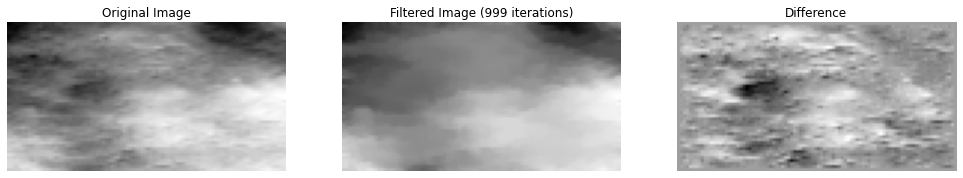

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (17,12))
axes[0].imshow(lena, cmap=cm.Greys_r)
axes[0].set_title('Original Image')
axes[0].set_axis_off()
axes[1].imshow(lena_filtered, cmap=cm.Greys_r)
axes[1].set_title('Filtered Image ({0} iterations)'.format(iter_num))
axes[1].set_axis_off()

axes[2].imshow(lena - lena_filtered, cmap=cm.Greys_r)
axes[2].set_title('Difference')
axes[2].set_axis_off()

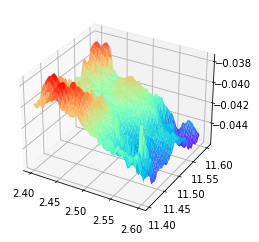

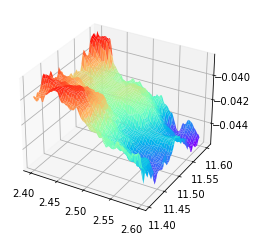

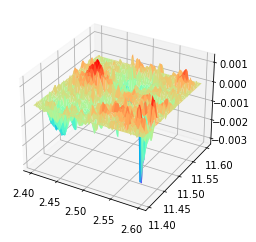

In [33]:
fig = plt.figure()  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')

#定义三维数据
xx = y.reshape(-1)
yy = x.reshape(-1)
X, Y = np.meshgrid(yy, xx)
Z = lena
Z2 = lena_filtered
Z3 = lena_filtered-lena
#作图
ax3.plot_surface(X,Y,Z,cmap='rainbow')
plt.show()
fig = plt.figure()  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')
ax3.plot_surface(X,Y,Z2,cmap='rainbow')
plt.show()
fig = plt.figure()  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')
ax3.plot_surface(X,Y,Z3,cmap='rainbow')
plt.show()